In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import json
from pprint import pp

from utils import CONFIG, PATH_LOG

In [62]:
top_k = 50

drop_columns = [
    "device",
    "learning_rate",
    "batch_size",
    "top_k",
    "seed",
    "epochs",
    "datasets",
    "log",
    "single_branch",
    "fusion_modalities",
    "fusion_type",
    "autoencoder",
    "ensemble_fusion",
    "info_nce"
]

if False:
    for k in CONFIG.top_k:
        if k != top_k:
            drop_columns.extend([f"Precision@{k}", f"Recall@{k}", f"NDCG@{k}"])

print(drop_columns)

['device', 'learning_rate', 'batch_size', 'top_k', 'seed', 'epochs', 'datasets', 'log', 'single_branch', 'fusion_modalities', 'fusion_type', 'autoencoder', 'ensemble_fusion', 'info_nce']


In [63]:
files = os.listdir(PATH_LOG)
settings = {}

for fname in files:
    with open(PATH_LOG / fname, "r", encoding="utf-8") as fin:
        lines = list(fin)
        epochs, train_loss, val_loss, *res = lines[-1].strip().split("\t")

        s = lines[0].split("alpha:")
        lines[0] = s[0]

        d = json.loads(lines[0])

        if len(s) == 2:
            alpha = s[1]
            d["Alpha"] = alpha

        d["Epochs"] = int(epochs)
        d["T-Loss"] = float(train_loss)
        d["V-Loss"] = float(val_loss)

        for i, k in enumerate(CONFIG.top_k):
            precision, recall, ndcg = res[i * 3:(i * 3)+3]
            d[f"Precision@{k}"] = float(precision)
            d[f"Recall@{k}"] = float(recall)
            d[f"NDCG@{k}"] = float(ndcg)

        settings[fname[:-4]] = d

df = pd.DataFrame(settings).T.convert_dtypes()
df = df.drop(columns=drop_columns)

df

,multimodal,embedding_dim,n_layers,dataset,freeze,weighting,Alpha,Epochs,T-Loss,V-Loss,...,NDCG@5,Precision@10,Recall@10,NDCG@10,Precision@20,Recall@20,NDCG@20,Precision@50,Recall@50,NDCG@50
2025-06-27T06:32:59+02:00,True,512,3,ml1m,True,alpha,0.9999619722366333,500,0.1855,0.2868,...,0.3017,0.2359,0.1767,0.2886,0.1897,0.2701,0.2931,0.1314,0.4356,0.3376
2025-06-27T15:08:16+02:00,True,512,2,ml1m,True,equal,<NA>,500,0.0802,0.3304,...,0.2874,0.2241,0.1771,0.277,0.1815,0.2706,0.2856,0.1264,0.4362,0.3329
2025-06-27T01:02:46+02:00,False,512,2,dbbook,True,False,<NA>,500,0.0173,0.4054,...,0.0756,0.0485,0.0759,0.076,0.0359,0.1114,0.0898,0.0242,0.184,0.1161
2025-06-27T16:16:10+02:00,True,512,1,ml1m,True,False,<NA>,500,0.0827,0.3297,...,0.285,0.2232,0.1763,0.2751,0.18,0.2675,0.2829,0.1252,0.4328,0.3299
2025-06-27T02:33:13+02:00,True,512,0,dbbook,True,equal,<NA>,500,0.0062,0.3781,...,0.0845,0.0544,0.0872,0.0861,0.0398,0.1255,0.101,0.0262,0.2007,0.1282
2025-06-27T18:15:59+02:00,True,512,0,ml1m,True,alpha,0.9999099969863892,500,0.0487,0.3897,...,0.2544,0.1971,0.1597,0.2454,0.1607,0.2456,0.2547,0.1151,0.4052,0.3025
2025-06-27T18:04:15+02:00,True,512,0,ml1m,False,False,<NA>,500,0.039,0.462,...,0.1996,0.16,0.1288,0.1963,0.1351,0.2082,0.2092,0.1005,0.3585,0.2559
2025-06-27T01:44:50+02:00,True,512,2,dbbook,True,normalized,<NA>,500,0.0601,0.3765,...,0.0859,0.0554,0.0882,0.0869,0.0411,0.1266,0.102,0.0284,0.2142,0.1337
2025-06-27T02:04:33+02:00,False,512,0,ml1m,True,False,<NA>,500,0.0405,0.4721,...,0.2012,0.1599,0.1288,0.197,0.1337,0.2059,0.2085,0.0989,0.3536,0.2538
2025-06-27T01:24:57+02:00,True,512,3,dbbook,True,normalized,<NA>,500,0.085,0.3887,...,0.0844,0.0538,0.0852,0.0851,0.0405,0.1245,0.1006,0.0278,0.2096,0.1315


In [166]:
new_df = df.drop(columns=["Alpha"]).where(
    (df["dataset"] == "dbbook")
    & (df["multimodal"] == True)
    & (df["freeze"] == True)
    & (df["weighting"] == False)
).dropna().sort_values(by="n_layers")

new_df

,multimodal,embedding_dim,n_layers,dataset,freeze,weighting,Epochs,T-Loss,V-Loss,Precision@5,...,NDCG@5,Precision@10,Recall@10,NDCG@10,Precision@20,Recall@20,NDCG@20,Precision@50,Recall@50,NDCG@50
2025-06-27T02:17:23+02:00,True,512,0,dbbook,True,False,500,0.0078,0.3687,0.0745,...,0.0906,0.0579,0.0925,0.092,0.0426,0.1352,0.1082,0.0271,0.2103,0.1353
2025-06-27T01:54:22+02:00,True,512,1,dbbook,True,False,500,0.0213,0.3675,0.079,...,0.0941,0.0607,0.0972,0.0954,0.0444,0.1396,0.1118,0.0285,0.2185,0.1405
2025-06-27T01:37:08+02:00,True,512,2,dbbook,True,False,500,0.0399,0.3772,0.079,...,0.094,0.0618,0.0985,0.0961,0.0451,0.1412,0.1126,0.0293,0.2231,0.1423
2025-06-27T01:15:28+02:00,True,512,3,dbbook,True,False,500,0.0623,0.3922,0.0779,...,0.0924,0.0615,0.0972,0.0948,0.0451,0.1409,0.1116,0.0296,0.2255,0.1422


In [167]:
dict_df = new_df.to_dict(orient="index")

l = []

for id, d in dict_df.items():
    values = [
        d["Precision@5"],
        d["Recall@5"],
        d["NDCG@5"],
        d["Precision@10"],
        d["Recall@10"],
        d["NDCG@10"],
        d["Precision@20"],
        d["Recall@20"],
        d["NDCG@20"],
        d["Precision@50"],
        d["Recall@50"],
        d["NDCG@50"]
    ]

    l.append(values)

for v in l:
    print(" ".join(["{:.4f}".format(x) for x in v]))

0.0745 0.0613 0.0906 0.0579 0.0925 0.0920 0.0426 0.1352 0.1082 0.0271 0.2103 0.1353
0.0790 0.0650 0.0941 0.0607 0.0972 0.0954 0.0444 0.1396 0.1118 0.0285 0.2185 0.1405
0.0790 0.0644 0.0940 0.0618 0.0985 0.0961 0.0451 0.1412 0.1126 0.0293 0.2231 0.1423
0.0779 0.0631 0.0924 0.0615 0.0972 0.0948 0.0451 0.1409 0.1116 0.0296 0.2255 0.1422


In [168]:
file = list(sorted(os.listdir(PATH_LOG)))[-1]
file = "2025-06-27T01:33:29+02:00.log"
file_path = PATH_LOG / file

with open(file_path, 'r') as f:
    config_line = f.readline().strip()
    config_line = config_line.split("alpha:")[0]
    config = json.loads(config_line)

data = pd.read_csv(file_path, sep='\t', skiprows=1)

In [169]:
epochs = data["Epoch"]
train_loss = data["T-Loss"]
val_loss = data["V-Loss"]

In [170]:
for k in drop_columns:
    if k in config:
        config.pop(k)
json_config = pd.DataFrame(config.values(), index=config.keys())
json_config

,0
multimodal,True
embedding_dim,512
n_layers,2
dataset,dbbook
freeze,False
weighting,False


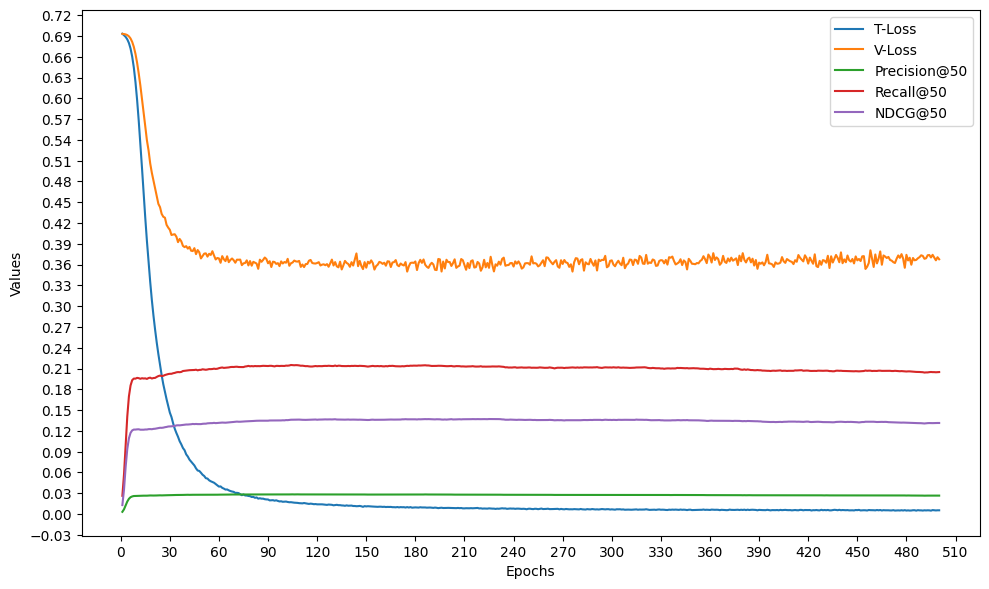

In [171]:
plt.figure(figsize=(10, 6))

plt.plot(epochs, train_loss, label="T-Loss")
plt.plot(epochs, val_loss, label="V-Loss")

for k in [50]:
    plt.plot(epochs, data[f"Precision@{k}"], label=f"Precision@{k}")
    plt.plot(epochs, data[f"Recall@{k}"], label=f"Recall@{k}")
    plt.plot(epochs, data[f"NDCG@{k}"], label=f"NDCG@{k}")


plt.xlabel('Epochs')
plt.ylabel('Values')
#plt.title(file_path)
plt.legend()

plt.gca().yaxis.set_major_locator(plt.MaxNLocator(nbins=30))
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=20))
#plt.yscale("log")

plt.tight_layout()
plt.show()